# Cavity example notebook 

A short hands-on example using Finesse and Pykat
Andreas Freise, 29.10.2019, GrEAT School Birmingham

## Importing the Finesse package

In [1]:
import numpy as np                         
import matplotlib.pyplot as plt                   
from pykat import finesse                  
from pykat.commands import *               
pykat.init_pykat_plotting(mode='display', fmts=['png'])

                                              ..-
    PyKat 1.1.349         _                  '(
                          \`.|\.__...-""""-_." )
       ..+-----.._        /  ' `            .-'
   . '            `:      7/* _/._\    \   (
  (        '::;;+;;:      `-"' =" /,`"" `) /
  L.        \`:::a:f            c_/     n_'
  ..`--...___`.  .    ,
   `^-....____:   +.      www.gwoptics.org/pykat



## Basic syntax

In [2]:
code = """
l L0 1 0 0 ni
s s1 1 ni n1
pd pd0 n1
xaxis s1 L lin 1 2 100
"""

# Create the basic Pykat-Finesse object
# I set tempdir and tempname parameters to specify
# where the Finesse file will be run, which can
# be useful for debugging
kat = finesse.kat(tempdir=".",tempname="test")
kat.verbose = False
kat.parse(code)
out = kat.run()

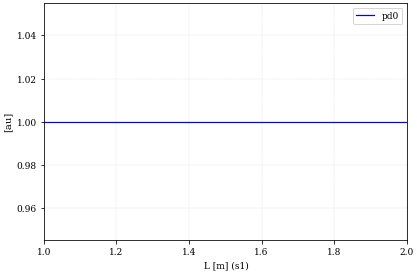

In [3]:
out.plot()

In [4]:
out['pd0']

array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.])

In [5]:
out.x

array([1.  , 1.01, 1.02, 1.03, 1.04, 1.05, 1.06, 1.07, 1.08, 1.09, 1.1 ,
       1.11, 1.12, 1.13, 1.14, 1.15, 1.16, 1.17, 1.18, 1.19, 1.2 , 1.21,
       1.22, 1.23, 1.24, 1.25, 1.26, 1.27, 1.28, 1.29, 1.3 , 1.31, 1.32,
       1.33, 1.34, 1.35, 1.36, 1.37, 1.38, 1.39, 1.4 , 1.41, 1.42, 1.43,
       1.44, 1.45, 1.46, 1.47, 1.48, 1.49, 1.5 , 1.51, 1.52, 1.53, 1.54,
       1.55, 1.56, 1.57, 1.58, 1.59, 1.6 , 1.61, 1.62, 1.63, 1.64, 1.65,
       1.66, 1.67, 1.68, 1.69, 1.7 , 1.71, 1.72, 1.73, 1.74, 1.75, 1.76,
       1.77, 1.78, 1.79, 1.8 , 1.81, 1.82, 1.83, 1.84, 1.85, 1.86, 1.87,
       1.88, 1.89, 1.9 , 1.91, 1.92, 1.93, 1.94, 1.95, 1.96, 1.97, 1.98,
       1.99, 2.  ])

In [6]:
out.info()


--- Output info ---

Run date and time: 2019-10-29 09:02:25.807972
Detectors used: pd0

One xaxis used: ['xaxis s1 L lin 1 2 100']
pd0 : min = 1.000000000000000e+00 max = 1.000000000000000e+00


## Setting up a cavity

In [7]:
code = """
l L0 1 0 0 ni
s s1 1 ni n1
m m1 0.9 0.1 0 n1 n2
s s2 10 n2 n3
m m2 0.99 0.01 0 n3 n4
"""
code2 = """
pd refl n1
pd trans n4
"""

base = finesse.kat(tempdir=".",tempname="test")
base.verbose = False
base.parse(code)


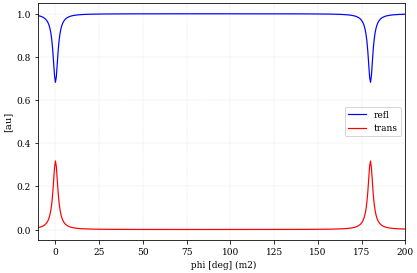

In [8]:
kat = base.deepcopy()
kat.parse(code2)
kat.parse("xaxis m2 phi lin -10 200 400")
out = kat.run()
out.plot()

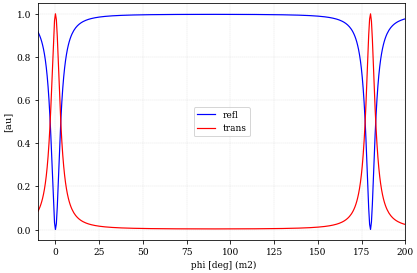

In [9]:
kat.m2.setRTL(0.9,0.1,0)
out = kat.run()
out.plot()

## Length, tuning and frequency

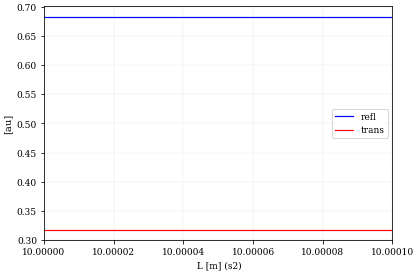

In [10]:
kat = base.deepcopy()
kat.parse(code2)
kat.parse("xaxis s2 L lin 10 10.0001 400")
out = kat.run()
out.plot()

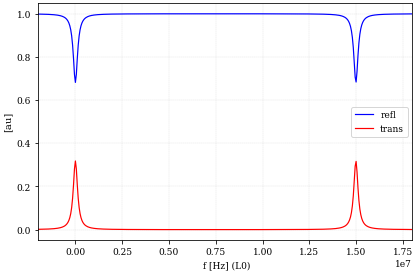

In [12]:
kat = base.deepcopy()
kat.parse(code2)
kat.parse("xaxis L0 f lin -2M 18M 400")
out = kat.run()
out.plot()

## Amplitudes

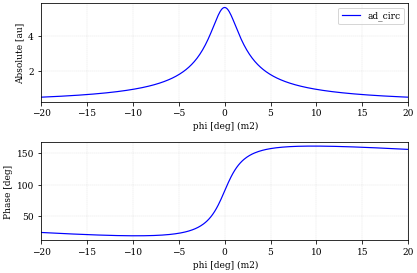

In [17]:
kat = base.deepcopy()
kat.parse("ad ad_circ 0 n2")
kat.parse("yaxis abs:deg")
kat.parse("xaxis m2 phi lin -20 20 400")
out = kat.run()
out.plot()

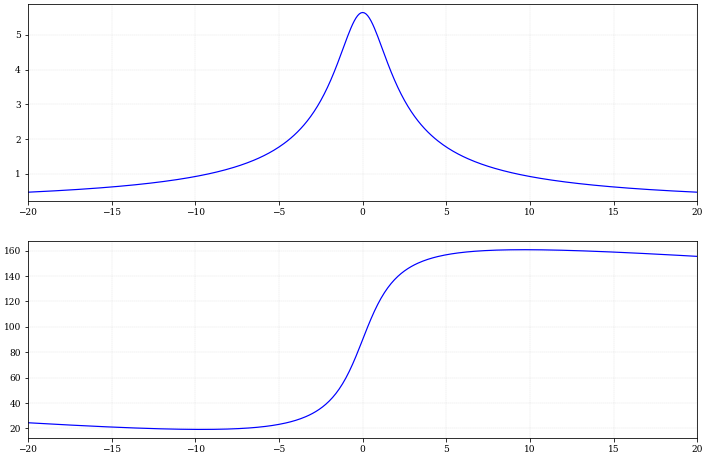

In [18]:
fig, axes = plt.subplots(2,1, figsize=(12,8), squeeze=False)
ax =axes.flatten()
y=out['ad_circ']
ax[0].plot(out.x,np.abs(y))
ax[1].plot(out.x,np.rad2deg(np.unwrap(np.angle(y))))

## Transfer function

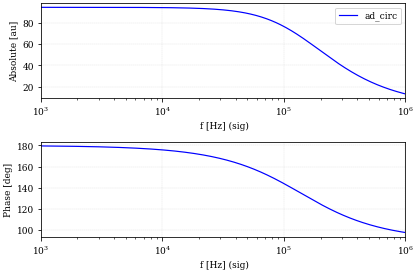

In [21]:
kat = base.deepcopy()
code3 = """
fsig sig m2 1 0
ad ad_circ 1 n2
yaxis abs:deg
xaxis sig f log 1k 1M 400
put ad_circ f $x1
"""
kat.parse(code3)
out = kat.run()
out.plot()